# 📊 Ocena Modelu!

Ten notebook pokazuje jak oceniamy modele:
- Regresji (czy przewidział dobrze liczbę?)
- Klasyfikacji (czy zgadł poprawnie klasę?)

Używamy gotowych funkcji z `sklearn.metrics`.

## 📈 1. Ocena modelu regresji

### ℹ️ Metryki regresji:

- **MSE (Mean Squared Error)** – średnia z kwadratów różnicy między wartością prawdziwą a przewidywaną.
  - Wzór (dla ciekawych):  
    `MSE = (1/n) * Σ(y_true - y_pred)^2`
  - ➕ Im **mniejsza**, tym lepiej.

- **R² (R-kwadrat)** – mówi, jak dobrze model tłumaczy dane:
  - `R² = 1` — idealne dopasowanie,
  - `R² = 0` — model nic nie tłumaczy (tak jakby zawsze zgadywał średnią),
  - `R² < 0` — model gorzej niż zgadywanie średniej.

### 🔧 Przykład: przewidywanie ceny mieszkania

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_true = np.array([200, 250, 300, 350])
y_pred = np.array([190, 260, 310, 340])

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse:.2f}")
print(f"Dopasowanie modelu (R²): {r2:.2f}")


Średni błąd kwadratowy (MSE): 100.00
Dopasowanie modelu (R²): 0.97


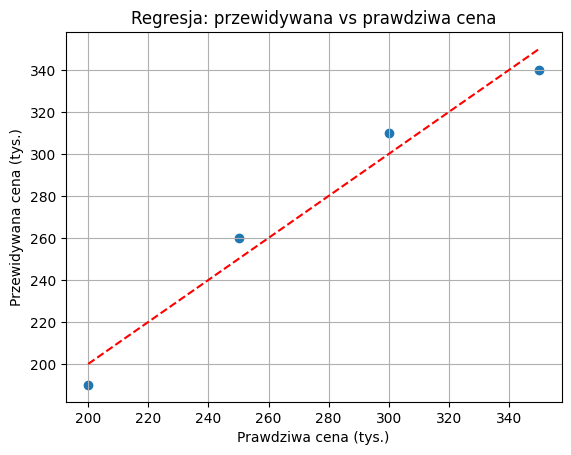

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Prawdziwa cena (tys.)")
plt.ylabel("Przewidywana cena (tys.)")
plt.title("Regresja: przewidywana vs prawdziwa cena")
plt.grid(True)
plt.show()

## ✅ 2. Ocena modelu klasyfikacji

### ℹ️ Metryki klasyfikacji:

- **Accuracy** – jaki % odpowiedzi model trafił.
- **Precision** – z tych, które model uznał za pozytywne, ile naprawdę nimi było?
- **Recall** – z prawdziwych pozytywnych przypadków, ile model wykrył?
- **F1-score** – połączenie Precision i Recall (średnia harmoniczna).
  - Przydatne, gdy dane są niezbalansowane.

- **Macierz pomyłek** – tabela pokazująca:
  - gdzie model miał rację,
  - gdzie się pomylił (np. mylił niezdających ze zdającymi).

### 🎯 Przykład: czy ktoś zda egzamin?

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1:", f1_score(y_true, y_pred))
print("Macierz pomyłek:")
print(confusion_matrix(y_true, y_pred))


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1: 0.75
Macierz pomyłek:
[[3 1]
 [1 3]]


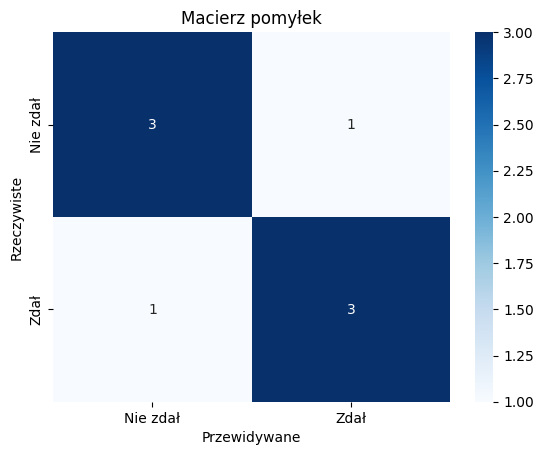

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nie zdał', 'Zdał'], yticklabels=['Nie zdał', 'Zdał'])
plt.xlabel("Przewidywane")
plt.ylabel("Rzeczywiste")
plt.title("Macierz pomyłek")
plt.show()

📊 Przykład: czemu warto patrzyć na wiele metryk a nie tylko jedną

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generujemy dane
y_true = [0] * 90 + [1] * 10  # 90 osób niezdało, 10 zdało
y_pred = [0] * 100  # Model przewidział, że wszyscy niezdali

# Obliczamy metryki
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Wypisujemy wyniki
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
